In [2]:
# Price Optimization: Overview
# Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices. It involves competitive analysis to monitor market positioning, customer segmentation to identify varying willingness to pay, and the use of mathematical optimization algorithms to determine the best price points.

# To get started with the task of Price Optimization, we need a dataset based on sales, costs, competition, and market trends. I found an ideal dataset for this task which contains features like:

# Fiscal_Week_Id: The fiscal week identifier.
# Store_Id: The store identifier.
# Item_Id: The item identifier.
# Price: The price of the item at our store.
# Item_Quantity: The quantity of the item sold.
# Sales_Amount_No_Discount: Sales amount without discount.
# Sales_Amount: Sales amount after discounts.
# Competition_Price: The price of the item at a competing store.

In [3]:
# importing the necessary Python libraries and the dataset:

In [4]:
import pandas as pd

pricing_data = pd.read_csv(r"C:\Users\HP\Downloads\Competition_Data.csv")

print(pricing_data.head())

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [5]:
# Let’s have a look at the column info before moving forward:

In [6]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [7]:
# start by comparing the price distribution with the competition:

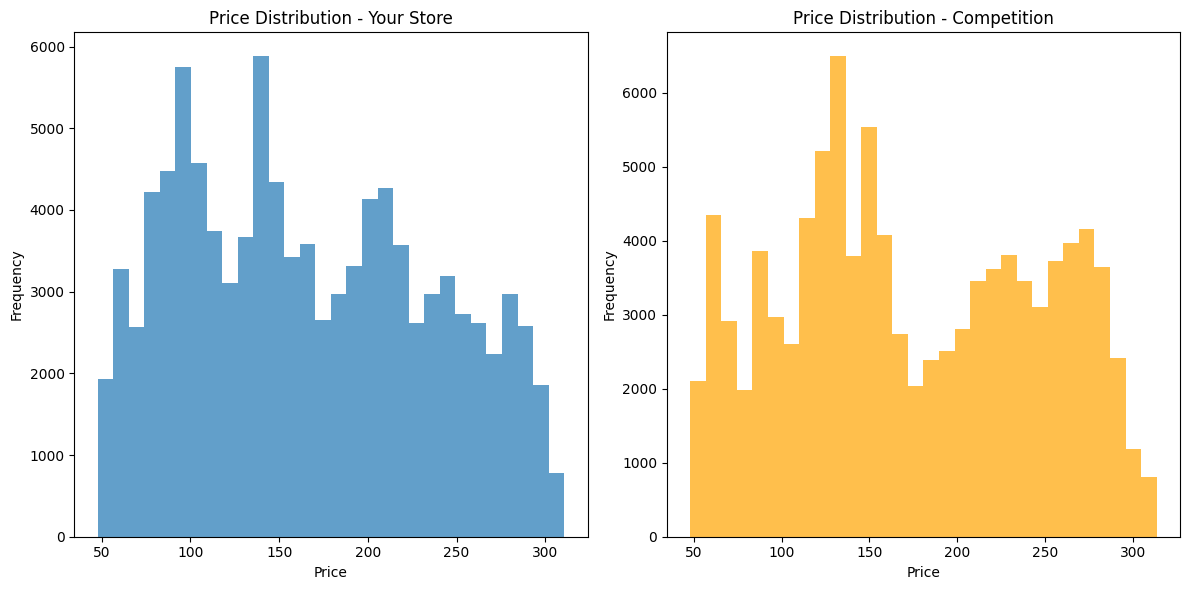

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

In [9]:
# It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

In [10]:
 # compare the relationship between price and sales:

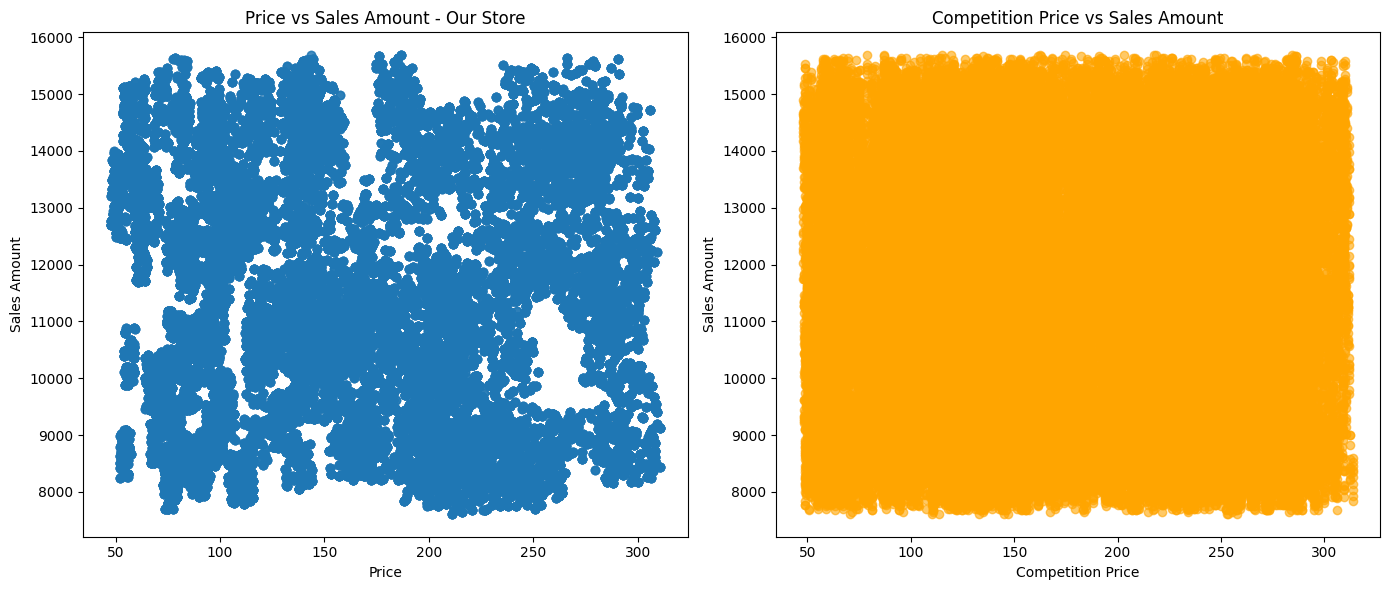

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.6, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

In [12]:
# The scatter plots compare the relationship between price and sales amount for our store (left) and the competition (right). For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition’s plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

In [13]:
# compare the price changes over time:

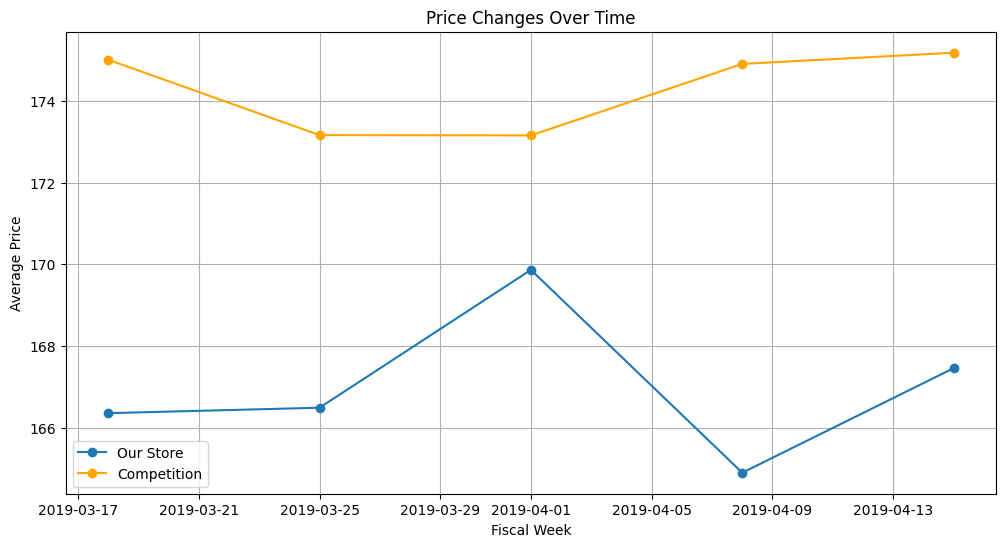

In [14]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

In [16]:
# analyze how changes in prices affect the change in quantity sold. For this, we need to calculate price elasticity. Here’s the formula used to calculate price elasticity:

In [17]:
# Ed = % change in quantity demanded / % change in price

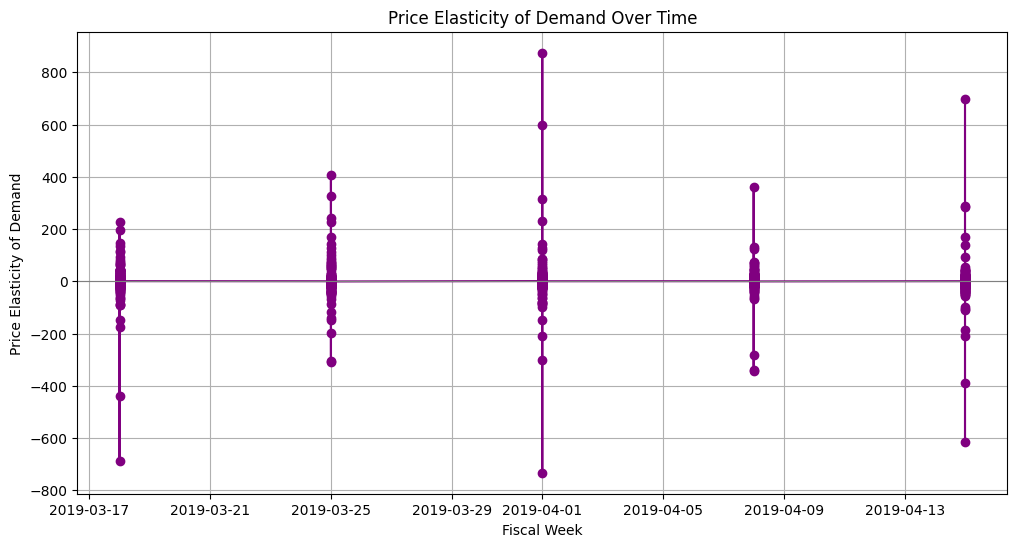

In [18]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

In [ ]:
# The graph shows the price elasticity of demand over time. It highlights significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive. It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably. High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

In [ ]:
# calculate and compare the total sales amounts for our store and the competition:

In [29]:
total_sales_your_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

total_qty_your_store = pricing_data['Item_Quantity'].sum()
total_qty_competition = pricing_data['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
}) 
summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.139687e+09,6.965710e+09
1,Total Quantity Sold,3.996113e+07,3.996113e+07


In [ ]:
# Our store’s total sales amount is 114,100,500, whereas the competition’s total sales amount is 696,209,700 (assuming equal quantity sold). The competition has a significantly higher total sales amount compared to our store. It indicates that their pricing strategy is more effective in generating revenue.

In [ ]:
# how the sales amounts vary across different price brackets to identify if there are specific price ranges where the competition outperforms our store:

In [30]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

C:\Users\HP\AppData\Local\Temp\ipykernel_17696\3558824510.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_17696\3558824510.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,3.050171e+06,8.105461e+06
1,51-100,2.505968e+08,5.252767e+08
2,101-150,2.874427e+08,1.308102e+09
3,151-200,2.048791e+08,1.138420e+09
4,201-250,2.104529e+08,1.732585e+09
5,251-300,1.699713e+08,2.074060e+09
6,301-350,1.329362e+07,1.791621e+08
7,351-400,0.000000e+00,0.000000e+00
8,401-450,0.000000e+00,0.000000e+00
9,451-500,0.000000e+00,0.000000e+00


In [ ]:
#  0-50 Bracket: The competition has significantly higher sales in this bracket.
# 51-100 Bracket: The competition outperforms our store by a wide margin.
# 101-150 Bracket: The competition’s sales are much higher than our store’s sales.
# 151-200 Bracket: The competition again has significantly higher sales.
# 201-250 Bracket: The competition’s sales are nearly double those of our store.
# 251-300 Bracket: The competition has higher sales, but the gap is smaller compared to other brackets.
# 301-350 Bracket: The competition has higher sales, though the overall sales amount is lower in this bracket compared to others.

In [ ]:
# Price Optimization with Dynamic Pricing

In [31]:
#segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

C:\Users\HP\AppData\Local\Temp\ipykernel_17696\1358992634.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
C:\Users\HP\AppData\Local\Temp\ipykernel_17696\1358992634.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
C:\Users\HP\AppData\Local\Temp\ipykernel_17696\1358992634.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,segment,avg_elasticity
0,Medium,0.156365
1,High,0.147853


In [ ]:
# Medium Segment (Inelastic Demand): Small changes in price won’t significantly affect demand. We can slightly increase prices to maximize revenue without losing much in sales volume.
# High Segment (Elastic Demand): Demand is sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.

In [ ]:
# dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue:

In [32]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.139687e+09,6.249350e+09
1,Total Quantity Sold,3.996113e+07,3.996113e+07


In [ ]:
# The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue. Now, let’s finish this task by adding the dynamic prices in the dataset:

In [33]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']